In [1]:
# в _extras пихаем всякие RND, обучалки и пр
# сделать тестинг всего сервиса
# сделать прогресс-бар генерации

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('./image_generation/app/services/')

---

# Image Generator

In [2]:
%%time
%load_ext autoreload
%autoreload 2

from image_generator import ImageGenerator


weights_path = '~/ImgGenerator/weights/models--stabilityai--stable-diffusion-xl-base-1'
lora_weights_path = '~/ImgGenerator/weights/lora/pytorch_lora_weights.safetensors'

img_generator = ImageGenerator(device='cuda:1')
img_generator.initialize_pipeline(weights_path)
img_generator.load_lora_weights(lora_weights_path)

/home/a.lugovoi/.conda/envs/a.lugovoi.py310/lib/python3.10/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)
2024-06-16 14:49:43.061561: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-16 14:49:43.064460: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-16 14:49:43.120654: I tensorflow/core/platf

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

CPU times: user 9.61 s, sys: 6.72 s, total: 16.3 s
Wall time: 10 s


In [5]:
%%time

prompt = ["3D isometric icon of mobile phone in vkyahxxqhg style, white background, hight detailed 4k"]
negative_prompt = ["blur, low resolution, distortion"]

result = img_generator.generate_images(
    prompt, 
    negative_prompt,
    num_inference_steps=50,
    guidance_scale=12,
    height=512,
    width=512,
    eta=0.0,
    num_images_per_prompt=1,
    seed=5
)

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: user 5.54 s, sys: 22.9 ms, total: 5.56 s
Wall time: 5.54 s


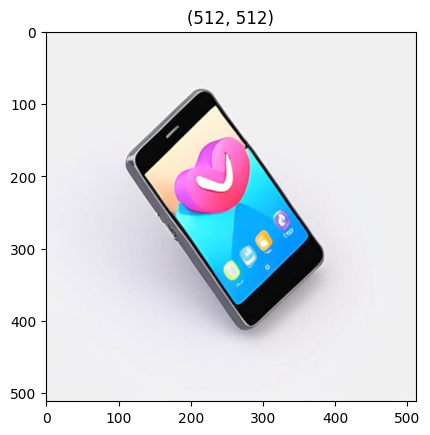

In [6]:
img = result[0]
plt.imshow(img)
plt.title(img.size)
plt.show()